#### Name:Saesha Wadhwa
#### Affiliation: University of Washington 

# Agricultural Pest Identification Using Machine Learning

## Research Questions

##### 1)Can machine learning models accurately classify agricultural pests from images?

This question explores the feasibility of using ML for pest identification, focusing
on model accuracy and reliability.

##### 2)How do environmental factors influence pest classification accuracy?

Investigates whether attributes like soil type or plant species affect model
performance, aiming to enhance real-world applicability.

##### 3)What are the distinctive features (e.g., size, color) of pests that aid in classification?


Examines which pest characteristics are most informative for ML models,
providing insights for farmers on key identification traits.

## Motivation

Coming from a country where agriculture is a major occupation, I have seen how pest
infestations cause major crop losses and financial hardship for farmers. Many still rely
on traditional identification methods or broad pesticides, which are often ineffective and
harmful to the environment.

My project aims to address this issue by using machine learning to identify agricultural
pests from images. It will test how accurately models/algorithms can classify pests,
study how environmental factors such as soil type or plant species affect classification,
and examine which visual features like size, color, and shape are most useful for
identification. The backgrounds in the images can also be studied to provide insights
into where certain pests are commonly found, helping connect pest type with habitat
conditions.

By answering these questions, my project aims to create reliable pest detection tools
that support farmers in early diagnosis and better pest management, ultimately
improving crop yield, reducing pesticide misuse,promoting sustainable farming and
reducing food waste.

## Data Setting

#### Primary Dataset: Agricultural Pests Image Dataset from Kaggle

This dataset comprises images of 12 different types of agricultural pests, including ants,
bees, beetles, caterpillars, earthworms, earwigs, grasshoppers, moths, slugs, snails,
wasps, and weevils.There are in total 5494 images and the distribution of images is
balanced for each type of insect about 470-500.

Link to dataset:
https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset

#### Supplementary Dataset: Web-scraped images using BeautifulSoup
To enhance the dataset, I will scrape additional pest images of these types from
agricultural websites. By doing this I can introduce more variability and real-world
pictures into the model training process.

My dataset doesn’t have an explicit datasheet. 

So, I will perform more analysis on this
while doing the project.Just by looking at some data,these are potential complications:

1) Scraped images vary in quality and labeling accuracy,so they could potentially
introduce noise into the dataset.

2) A few images contain multiple insects,so it’s uncertain how labels will be
assigned

3) Some Images lack contextual information about the environment, such as soil
type or plant species, which could influence pest classification.

## Method and Overview

Step 1: Data Collection

Data manipulation functions:

1) Download the Kaggle dataset and load it in.

2) Use BeautifulSoup to scrape images from agricultural websites that have
relevant images to the categories of my dataset.

3) I will then look through some test data just to see how it has been loaded in the
notebook.This can also be done for scraped data by only looking at some URLs.

Through this process I am trying to ensure that I have diverse data from many potential
sources to support my argument to identify features of the insect and its impact to
accurately identify them.

Step 2: Data Pre-processing and cleaning

Data manipulation functions:
    
1) Resize images to a uniform size

2) Apply techniques like rotation, flipping, and color adjustment to increase dataset
training.I will test each function on a small subset of images first and then
proceed further.

3) Check for missing blurry or missing images.

Through this process I am trying to ensure that I can determine whether using ML and
other algorithms can be beneficial to identify pests from images.

Step 3: Model Development

Data manipulation functions:
    
1) Implement Convolutional Neural Networks

2) Train the CNNs using tensorflow

3) Use other pretrained models.

4) I will test the model summary by tweaking parameters. Then ,see how well the model
performs on some set of training and test data and then some other set to
ensure that the model fits with my questions.

Using CNN with TensorFlow meets the challenge goals of doing advanced machine
learning and is appropriate for doing image data analysis which is essential to my
project.


Step 4: Model Evaluation
Data manipulation functions:

1) Assess model performance using accuracy, precision metrics like F tests or T
tests.

Plotting functions:

1) I will try to plot the difference in predicted and actual results to better visualise
where the models fail and where it gives accurate results.

The testing for can help identify which pests are misclassified and which of their
features are not as important as the others.


### Importing all the important libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
import cv2
import os 
from pathlib import Path
import doctest

## Exploratory Data Analysis

##### Loading and reading in the data

In [2]:
data_dir='data'
os.listdir(data_dir)

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

#### Shape and size of data

In [3]:
data=tf.keras.utils.image_dataset_from_directory('data',
    labels='inferred',
    label_mode='categorical',
    class_names=['ants', 'bees', 'beetle','catterpillar','earthworms','earwig',
                 'grasshopper','moth','slug','snail','wasp','weevil'], 
    image_size=(128,128),
    batch_size=32)

Found 5497 files belonging to 12 classes.


In [4]:
data.class_names

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

In [5]:
data_iterator=data.as_numpy_iterator()

In [6]:
batch=data_iterator.next()

### Exploring a small batch of data

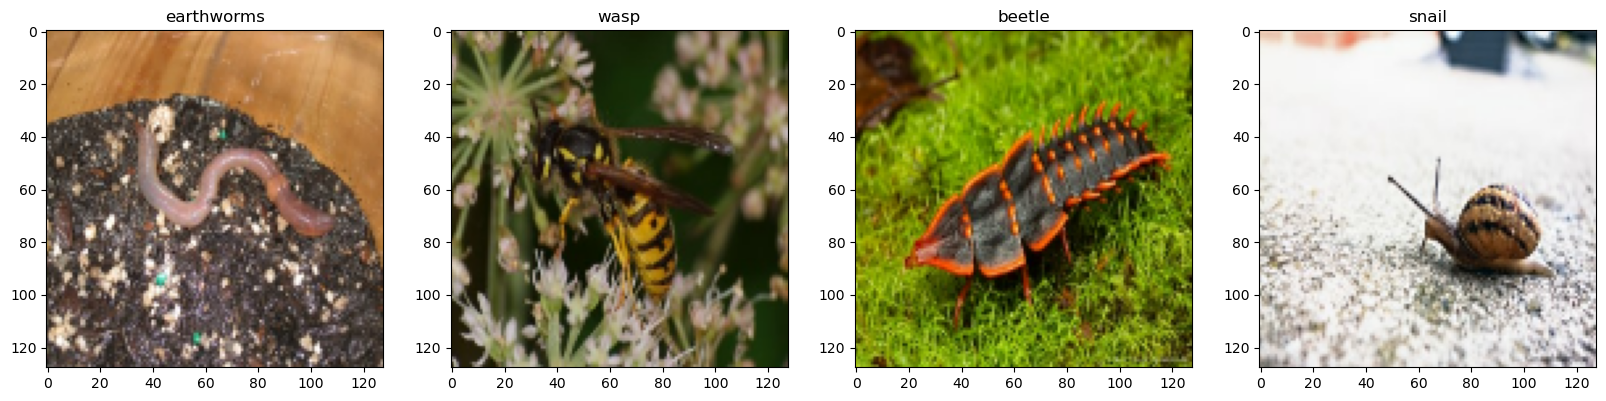

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))  

for idx, img in enumerate(batch[0][:4]):  
    ax[idx].imshow(img.astype(int))
    
   
    class_idx = np.argmax(batch[1][idx])
    class_name = data.class_names[class_idx]
    
    ax[idx].set_title(class_name)
    

plt.show()


## Rows and columns the dataset

In [8]:
def count_images_per_class(data_path, extensions=("*.jpg", "*.jpeg", "*.png")):
    """
    Counts the number of images per class in a directory structure.
    Takes in path, a string value, to the main data directory where each subdirectory is considered a class.
    and file extensions to include (default is ("*.jpg", "*.jpeg", "*.png")) are default or can be passed.It returns aDataFrame
    with columns "Class" and "Image Count", sorted by class name.

    >>> df_counts = count_images_per_class("data")
    
               Class  Image Count
    0           ants          499
    1           bees          500
    2         beetle          416
    3   catterpillar          434
    4     earthworms          323
    5         earwig          466
    6    grasshopper          485
    7           moth          497
    8           slug          391
    9          snail          500
    10          wasp          498
    11        weevil          485
        
    
    >>> print("Total images:", df_counts["Image Count"].sum())
    Total images: 5494
          
    """
    data_path = Path(data_path)  
    rows = []

    for class_dir in data_path.iterdir():
        if class_dir.is_dir():
            count = 0
            for ext in extensions:
                count += len(list(class_dir.glob(ext)))
            rows.append({"Class": class_dir.name, "Image Count": count})

    df_counts = pd.DataFrame(rows).sort_values("Class").reset_index(drop=True)
    return df_counts
doctest.testmod()

TestResults(failed=0, attempted=2)

#### DataFrame of images with column of rows of different classes and distribution of each kind of pest

In [9]:
df_counts=count_images_per_class('data')
df_counts

,Class,Image Count
0,ants,499
1,bees,500
2,beetle,416
3,catterpillar,434
4,earthworms,323
5,earwig,466
6,grasshopper,485
7,moth,497
8,slug,391
9,snail,500


In [10]:
total_images = df_counts["Image Count"].sum()
print(f"Total number of images: {total_images}")

Total number of images: 5494


#### Checking for corrupted files in dataset folder and missing images

In [11]:
def check_missing(data_path, extensions=("*.jpg", "*.jpeg", "*.png")):
    """
    Counts images per class and identifies corrupted/unreadable image files. and file extensions to include ,("*.jpg", "*.jpeg", "*.png")) are default 
    or can be passed.It returns a list of pathlib.Path objects pointing to corrupted/unreadable image files.

    >>> check_missing('data',extensions=("*.jpg", "*.jpeg", "*.png"))
    []
    """
    data_path = Path(data_path)
    class_counts = {}
    corrupted_files = []

    
    for class_folder in data_path.iterdir():
        if class_folder.is_dir():
            image_files = []
            for ext in extensions:
                image_files.extend(list(class_folder.glob(ext)))
            
            
            
            
            for img_path in image_files:
                try:
                    with Image.open(img_path) as img:
                        img.verify()  
                except Exception:
                    corrupted_files.append(img_path)
    
    
    return corrupted_files
doctest.testmod()

TestResults(failed=0, attempted=3)

## Variables of Interest
#### Features of Data
##### Height, Width and color pixels of each image
Each image in the set represents an agricultural pest. Every pixel in the image holds three numerical values of Red,green and blue pixels, capturing the pest’s color, texture, and shape.

#### Relation to research

This information of color pixel is the basis to understand the visual features the models will learn from.
Each image pixel and pattern identified for each category will provide an insight into what are the speciffic characteristics of various kinds of pests. This will also provide information about the environment in which the pest is most generally finds habitation.

In [12]:
for images, labels in data.take(1):
    sample_img = images[0].numpy()
    print("Single image shape:", sample_img.shape)
    print("Height:", sample_img.shape[0])
    print("Width:", sample_img.shape[1])
    print("Channels:", sample_img.shape[2])

Single image shape: (128, 128, 3)
Height: 128
Width: 128
Channels: 3


#### Target variables
##### Categories of Pests:

'ants', 'bees', 'beetle', 'caterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil'

Each image is labeled according to the pest species it depicts.

#### Relation to research

The machine learning model must predict these categories accurately.
Comparing visual features across different classes will reveal which species are easily found, misevaluated or visually distinct.

## Image Processing
1)Height and width of each image has been set to 128 by 128 pixels to train models efficiently.

2)Pixels will be scaled to represent numbers between 0 and 1 for simpler interpratation, visualisation and comphrehension.

#### Summary of pixel values for a few images in a batch of data

In [13]:
for images, labels in data.take(1):
    batch = images.numpy()


R_mean = batch[:,:,:,0].mean()
G_mean = batch[:,:,:,1].mean()
B_mean = batch[:,:,:,2].mean()

print(f"Average pixel values per color (R, G, B): {R_mean:.2f}, {G_mean:.2f}, {B_mean:.2f}")
print(f"Pixel value range: {batch.min()} - {batch.max()}")


Average pixel values per color (R, G, B): 133.59, 123.33, 88.70
Pixel value range: 0.0 - 255.0


## Visualisation of Data

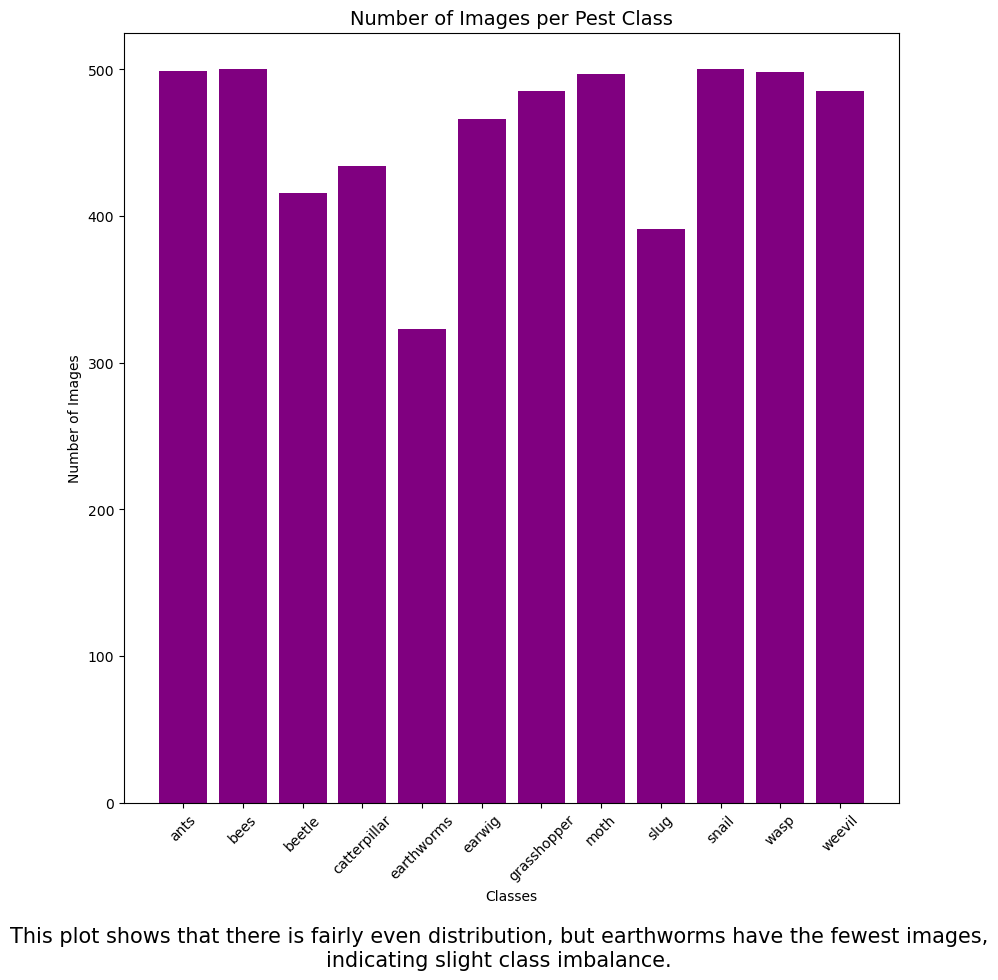

In [14]:
plt.figure(figsize=(10,10))
plt.bar(df_counts["Class"], df_counts["Image Count"], color='purple')
plt.xticks(rotation=45)
plt.title("Number of Images per Pest Class", fontsize=14)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.figtext(0.5, -0.05,
            "This plot shows that there is fairly even distribution, "
            "but earthworms have the fewest images, indicating slight class imbalance.",
            wrap=True, horizontalalignment='center', fontsize=15)
plt.show()


In [15]:
def compute_avg_rgb_per_class(data):
    """
    This function computes the average RGB values for each class of the TensorFlow dataset
    It takes in TensorFlow dataset as parameter.It returns a dataframe with the average values of 
    each class's RGB values as rows of the dataframe.
    """
   
    class_sums = {}
    class_counts = {}

    for class_name in data.class_names:
        class_sums[class_name] = np.array([0.0, 0.0, 0.0])
        class_counts[class_name] = 0

    
    for images, labels in data:
        images = images.numpy()
        labels = labels.numpy()

        for img, label in zip(images, labels):
            class_index = np.argmax(label)
            class_name = data.class_names[class_index]

            
            class_sums[class_name] += img.mean(axis=(0, 1))
            class_counts[class_name] += 1

    
    avg_rgb_per_class = {}
    for class_name in data.class_names:
        if class_counts[class_name] > 0:
            avg_rgb_per_class[class_name] = class_sums[class_name] / class_counts[class_name]
        else:
            avg_rgb_per_class[class_name] = np.array([0.0, 0.0, 0.0])

    
    df_avg_rgb = pd.DataFrame([
        {"Class": c, "Red": avg_rgb_per_class[c][0],
         "Green": avg_rgb_per_class[c][1],
         "Blue": avg_rgb_per_class[c][2]}
        for c in data.class_names
    ])

    return df_avg_rgb


In [16]:
df_long = compute_avg_rgb_per_class(data).melt(id_vars='Class', value_vars=['Red','Green','Blue'],
                          var_name='Channel', value_name='Average')
df_long.head()


,Class,Channel,Average
0,ants,Red,145.125111
1,bees,Red,131.135216
2,beetle,Red,123.036024
3,catterpillar,Red,116.906840
4,earthworms,Red,121.064994


##### Graph of average RGB values of each pest

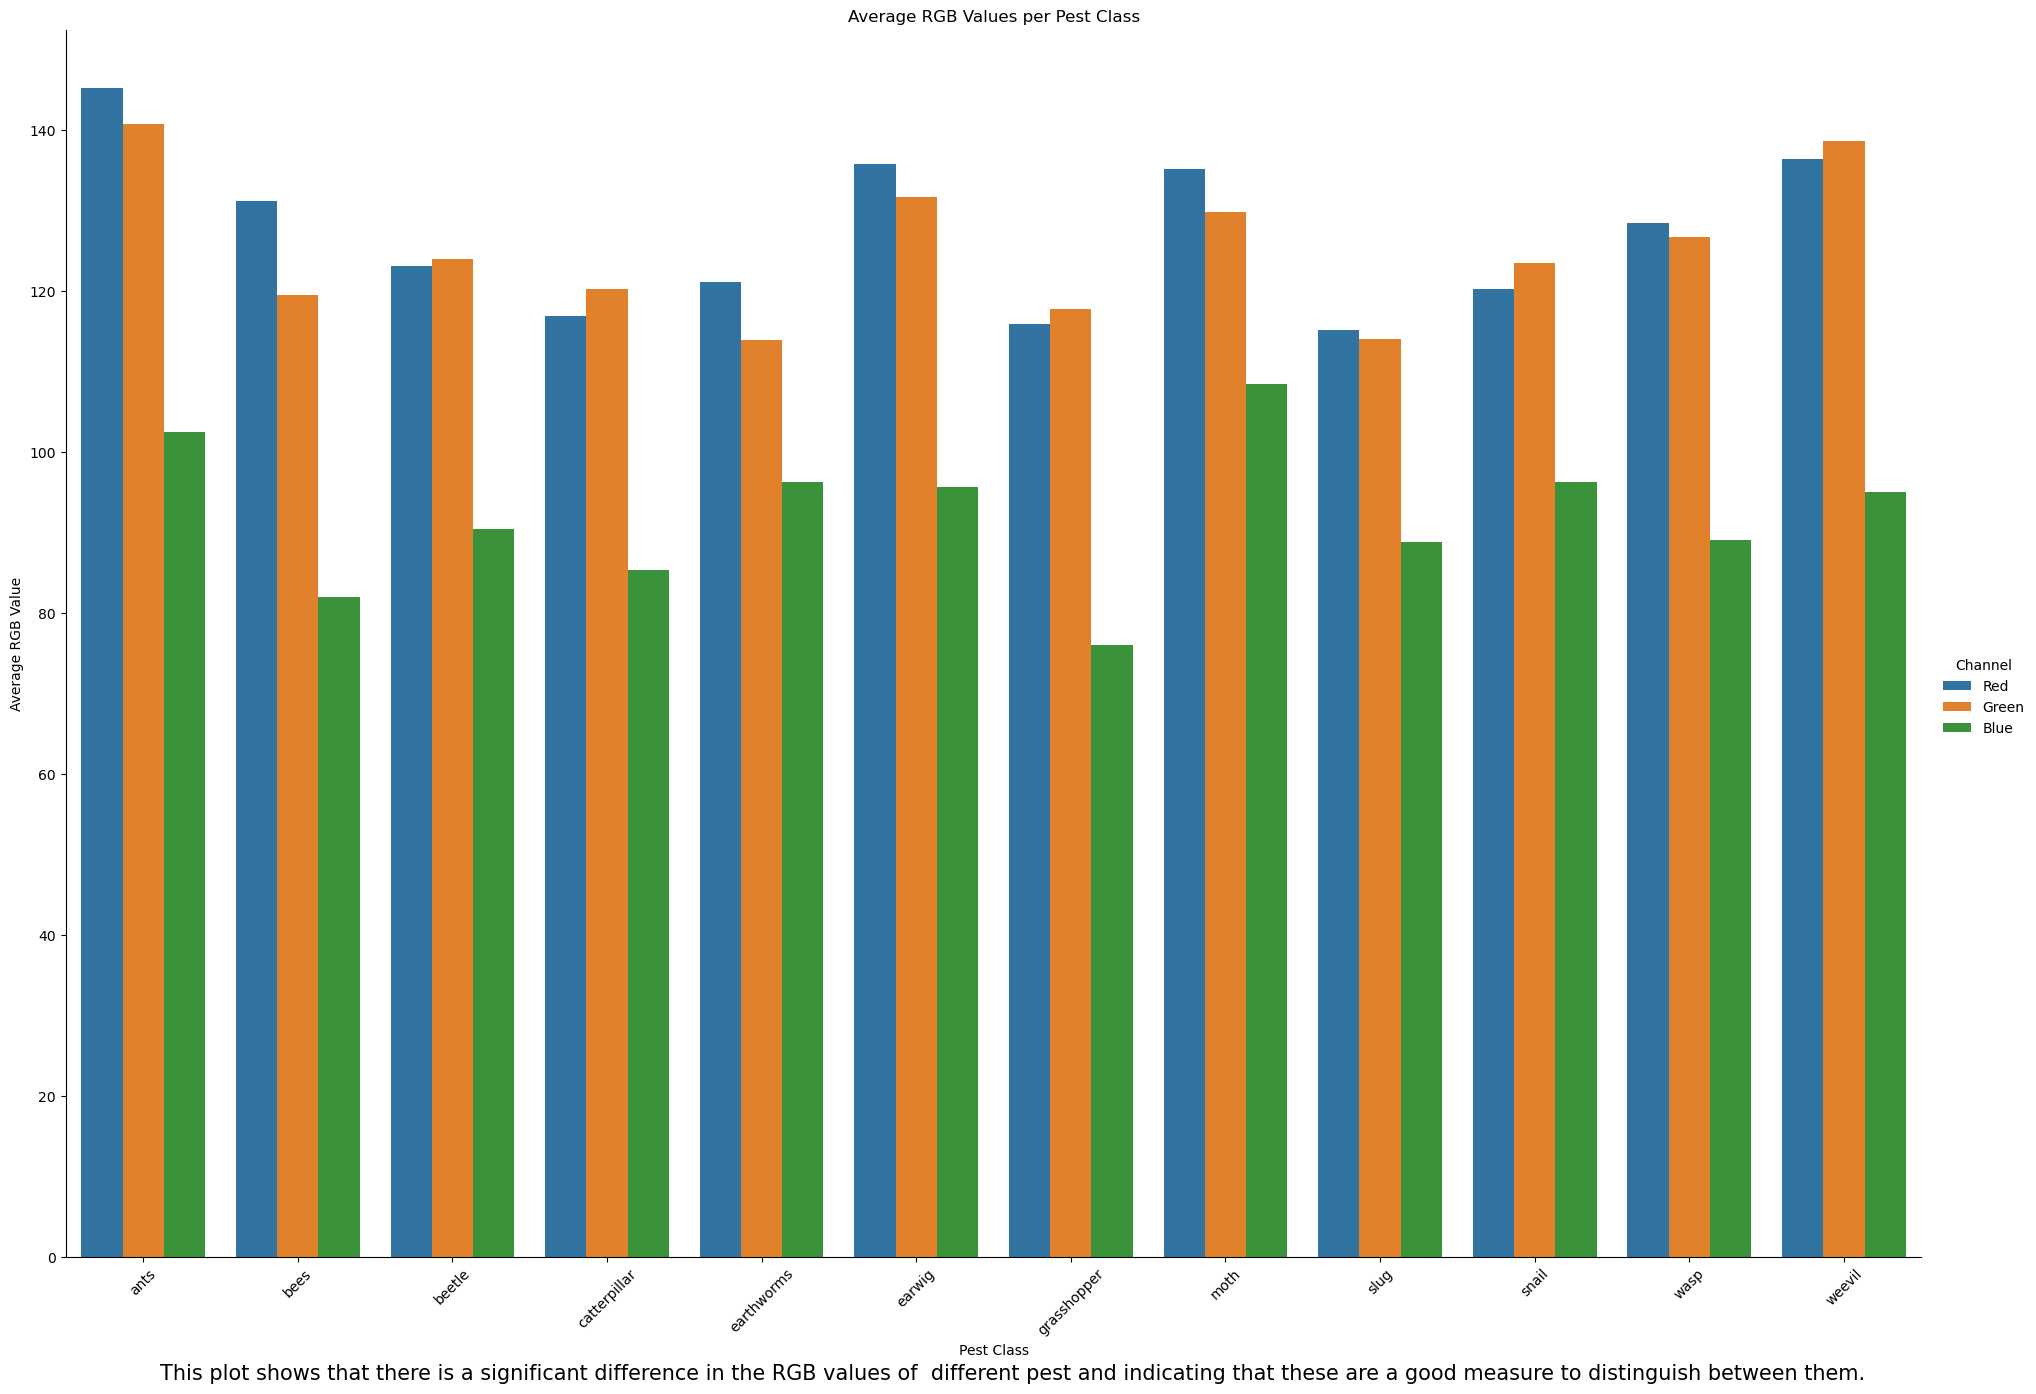

In [17]:
sns.catplot(
    data=df_long,
    x='Class',
    y='Average',
    hue='Channel',
    kind='bar',
    height=13,
    aspect=1.5
)

plt.title("Average RGB Values per Pest Class")
plt.xlabel("Pest Class")
plt.ylabel("Average RGB Value")
plt.xticks(rotation=45)
plt.figtext(0.5, -0.05,
            "This plot shows that there is a significant difference in the RGB values of "
            " different pest and indicating that these are a good measure to distinguish between them.",
            wrap=True, horizontalalignment='center', fontsize=15)
plt.show()


### Challenge Goals

1) New Library -Beautiful Soup
My project will use the Beautiful Soup library to scrape information about
agricultural pests from online agricultural websites. This data may include pest
names, host plants, and environmental conditions where the pests are commonly
found. By combining this scraped data with my primary dataset, I want to create
a diverse dataset that connects image-based information with realistic pest
features and habitats. This aids in answering my research question about finding
environments of pests

2) Advanced Machine Learning using TensorFlow
I plan to train a Convolutional Neural Network using TensorFlow to classify pests
from images in the dataset. According to my research, CNN can learn many
things automatically from images like texture and pattern, etc. By experimenting
with CNN, I will analyze model accuracy and identify which visual traits are most
useful for pest identification

### Plan Evaluation

My proposed estimates were realistic and it was a learning curve to understand various different libraries in python. I am still learning and am yet to implement web scraping to collect more data. I have done comphrensive and elaborate research on the materials and knowledge that I would require to complete this project. It requires a commitnent of a few hours regularly. In the coming days, I build CNN model, test it on various splits, web scrape data, test it's accuracy and try to answer all my reasearch questions.

### Testing

I have added doctest to some functions, used functions like .head() to check if the Datframe is as expected, graphed visualisations to support my data cleaning. In addition to that I have performed some testing on small batches of data to verify results.

Write a function for splitting data into 

In [18]:
import os
import shutil
import random

# ----------------------------
# CONFIG
# ----------------------------
DATASET_DIR = "data"    # folder containing 12 class folders
OUTPUT_DIR = "dataset_split"    # output folder

TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.15
TEST_SPLIT = 0.15

random.seed(42)

# ----------------------------
# SCRIPT
# ----------------------------
classes = [d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))]

for cls in classes:
    src_dir = os.path.join(DATASET_DIR, cls)
    images = os.listdir(src_dir)
    images = [img for img in images if img.lower().endswith((".jpg", ".png", ".jpeg"))]

    random.shuffle(images)

    n = len(images)
    n_train = int(n * TRAIN_SPLIT)
    n_val = int(n * VAL_SPLIT)
    # test gets the rest

    train_imgs = images[:n_train]
    val_imgs = images[n_train:n_train+n_val]
    test_imgs = images[n_train+n_val:]

    # make folders
    for folder in ["train", "val", "test"]:
        os.makedirs(os.path.join(OUTPUT_DIR, folder, cls), exist_ok=True)

    # copy files
    for img in train_imgs:
        shutil.copy(os.path.join(src_dir, img),
                    os.path.join(OUTPUT_DIR, "train", cls))

    for img in val_imgs:
        shutil.copy(os.path.join(src_dir, img),
                    os.path.join(OUTPUT_DIR, "val", cls))

    for img in test_imgs:
        shutil.copy(os.path.join(src_dir, img),
                    os.path.join(OUTPUT_DIR, "test", cls))

    print(f"Class '{cls}' → {len(train_imgs)} train, {len(val_imgs)} val, {len(test_imgs)} test")

print("\nDataset split completed!")
print(f"Saved into folder: {OUTPUT_DIR}")


Class 'ants' → 349 train, 74 val, 76 test
Class 'bees' → 350 train, 75 val, 75 test
Class 'beetle' → 291 train, 62 val, 63 test
Class 'catterpillar' → 303 train, 65 val, 66 test
Class 'earthworms' → 226 train, 48 val, 49 test
Class 'earwig' → 326 train, 69 val, 71 test
Class 'grasshopper' → 339 train, 72 val, 74 test
Class 'moth' → 347 train, 74 val, 76 test
Class 'slug' → 273 train, 58 val, 60 test
Class 'snail' → 350 train, 75 val, 75 test
Class 'wasp' → 348 train, 74 val, 76 test
Class 'weevil' → 339 train, 72 val, 74 test

Dataset split completed!
Saved into folder: dataset_split


Training image preprocessing

In [19]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'dataset_split/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)   
    


Found 3841 files belonging to 12 classes.


Validation set

In [20]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'dataset_split/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)   
    

Found 818 files belonging to 12 classes.


In [21]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>

## Building the CNN model

### Importing necessary libraries

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras import layers

In [ ]:
model =Sequential()

In [ ]:
model.add(layers.Input(shape=(128, 128, 3)))

In [ ]:
model.add(RandomFlip("horizontal"))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.1))
model.add(RandomContrast(0.1))

# Building convolution layer

Convolutions and max pooling

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25)) 

FLattening operations

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))

In [ ]:
model.add(Dropout(0.4)) #

In [ ]:
#Output Layer
model.add(Dense(units=12,activation='softmax'))

Compiling the model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

## Model Training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=20)

In [ ]:
#if loss is increasing that is a problem of over shooting
# another cause is high learning rate, adam algo rithm is not able to minimise loss, take 0.0001
#chance of underfitting,so increase number of nuerons 1024 to 1500
#add more convolution layer to extract more feature from image
#add dropout , so whatever layer you are geting drop 25 percernt from them

Model evaluation on training set

In [ ]:
train_loss,train_accu =model.evaluate(training_set)

In [ ]:
print(train_loss,train_accu)

In [ ]:
train_loss,train_accu =model.evaluate(training_set)

## Efficient net

In [23]:
from tensorflow.keras.applications import EfficientNetB0

In [24]:
efficient_net=EfficientNetB0(weights='imagenet',include_top=False,input_shape=(128,128,3))

In [25]:
#freezing the bottom layers
for layer in efficient_net.layers:
    layer.trainable=False

In [26]:
from tensorflow import keras 
from tensorflow.keras import layers
model_eff=keras.Sequential([efficient_net,layers.GlobalAveragePooling2D(),keras.layers.Dense(1024,activation='relu'),keras.layers.Dense(512,activation='relu'),keras.layers.Dense(12,activation='softmax')])
model_eff.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model_eff.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,892,271 (22.48 MB)

 Trainable params: 1,842,700 (7.03 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [27]:
training_history_eff =model_eff.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 82s 520ms/step - accuracy: 0.7032 - loss: 1.1439 - val_accuracy: 0.8240 - val_loss: 0.5580
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 51s 423ms/step - accuracy: 0.8586 - loss: 0.4636 - val_accuracy: 0.8447 - val_loss: 0.4686
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 51s 423ms/step - accuracy: 0.8972 - loss: 0.3300 - val_accuracy: 0.8435 - val_loss: 0.4504
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 53s 435ms/step - accuracy: 0.9279 - loss: 0.2535 - val_accuracy: 0.8521 - val_loss: 0.4394
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 54s 445ms/step - accuracy: 0.9495 - loss: 0.1911 - val_accuracy: 0.8570 - val_loss: 0.4414
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 54s 444ms/step - accuracy: 0.9672 - loss: 0.1462 - val_accuracy: 0.8447 - val_loss: 0.4588
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 51s 419ms/step - accuracy: 0.9732 - loss: 0.1132 - val_accuracy: 0.8460 - val_loss: 0.4632
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 51s 418ms/step - accuracy: 0.9758 - loss: 0

In [28]:
train_loss_eff,train_accu_eff=model_eff.evaluate(training_set)

121/121 ━━━━━━━━━━━━━━━━━━━━ 42s 343ms/step - accuracy: 0.9984 - loss: 0.0238


In [31]:
print(f"the training loss is {train_loss_eff} and training accuracy is {train_accu_eff}")

the training loss is 0.02378685772418976 and training accuracy is 0.9984378814697266


In [32]:
val_loss_eff,val_Accu_eff= model_eff.evaluate(validation_set)

26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - accuracy: 0.8570 - loss: 0.4683


In [34]:
print(f"the validation loss is {val_loss_eff} and validation accuracy is {val_Accu_eff}")

the validation loss is 0.4682807922363281 and validation accuracy is 0.8569682240486145


Saving the model

In [35]:
model_eff.save('efficient_net.keras')

In [36]:
training_history_eff.history

{'accuracy': [0.7032023072242737,
  0.8586305379867554,
  0.8971621990203857,
  0.9278833866119385,
  0.949492335319519,
  0.9671960473060608,
  0.9731840491294861,
  0.9757875800132751,
  0.9880239367485046,
  0.9914084672927856],
 'loss': [1.1438742876052856,
  0.4635736048221588,
  0.3299930989742279,
  0.25349733233451843,
  0.19108043611049652,
  0.1462186723947525,
  0.11319593340158463,
  0.106869637966156,
  0.073223777115345,
  0.05577147379517555],
 'val_accuracy': [0.8239609003067017,
  0.8447432518005371,
  0.8435207605361938,
  0.8520782589912415,
  0.8569682240486145,
  0.8447432518005371,
  0.8459657430648804,
  0.8508557677268982,
  0.8581907153129578,
  0.8569682240486145],
 'val_loss': [0.5579818487167358,
  0.4686165153980255,
  0.4504469931125641,
  0.43935173749923706,
  0.4413600564002991,
  0.4588293135166168,
  0.4631504714488983,
  0.4566841721534729,
  0.4660423994064331,
  0.4682808220386505]}

In [38]:
#Recording model in json
import json
with open("training_hist_eff.json","w") as f:
    json.dump(training_history_eff.history,f)


## Accuracy Visualisation for Effiecient Net

In [40]:
epochs =[i for i in range(1,11)]
epochs         

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

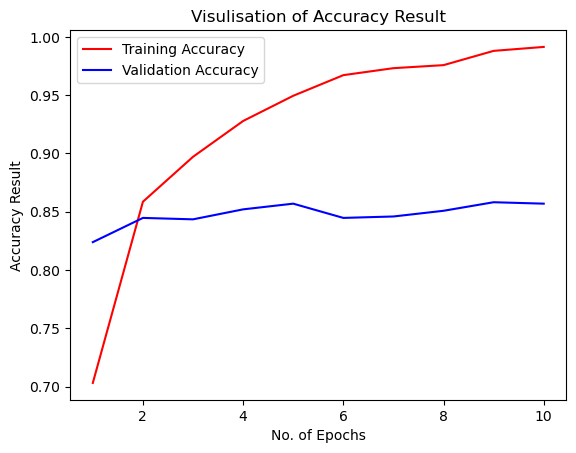

In [42]:
plt.plot(epochs,training_history_eff.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history_eff.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulisation of Accuracy Result")
plt.legend()
plt.show()

Metrics to evaluate the model

Calculation Precision,Recall and Confusion Matrix

In [45]:
class_name= validation_set.class_names
class_name

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

In [46]:
test_set=training_set=tf.keras.utils.image_dataset_from_directory(
    'dataset_split/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)   

Found 835 files belonging to 12 classes.


In [47]:
y_pred= model_eff.predict(test_set)
y_pred

27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 555ms/step


array([[9.98450279e-01, 1.12207806e-06, 1.10913672e-04, ...,
        1.68590741e-08, 6.74122944e-04, 3.95245070e-06],
       [9.62439895e-01, 5.53631180e-05, 3.53337452e-02, ...,
        9.75064904e-06, 4.85090095e-05, 1.65562180e-03],
       [9.99976993e-01, 1.59628087e-07, 3.60200647e-06, ...,
        7.07053402e-08, 3.68967676e-06, 2.03044601e-06],
       ...,
       [4.53291555e-08, 4.45954207e-08, 6.38077175e-03, ...,
        8.44435775e-08, 6.54263943e-07, 9.93613303e-01],
       [2.00907397e-03, 6.30705290e-06, 4.92406543e-03, ...,
        1.37420255e-04, 1.20706409e-06, 9.90503609e-01],
       [8.04744632e-05, 1.27576295e-05, 3.25108971e-03, ...,
        2.70216464e-04, 5.68929818e-06, 9.76179004e-01]],
      shape=(835, 12), dtype=float32)

In [48]:
predicted_categories= tf.argmax(y_pred,axis=1)#columnwise axis=1

In [49]:
predicted_categories

<tf.Tensor: shape=(835,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  5,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  5,
        2,  2,  5,  0,  2,  2,  2,  2,  2,  2,  2,  2, 11,  2,  2,  2,  2,
        2, 11,  2,  6,  2,  2,  2, 11,  2,  5,  2,  2,  2,  2,  6,  8,  2,
       11, 10,  2, 11,  2,  5,  5,  2,  2, 11,  0,  2,  2,  2,  2,  6,  2,
        3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,

In [50]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories#one hot encoded

<tf.Tensor: shape=(835, 12), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(835, 12), dtype=float32)>

In [51]:
y_true=tf.argmax(true_categories,axis=1)#columnwise axis=1

In [52]:
y_true

<tf.Tensor: shape=(835,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,

Calculating precision and recall 

(np.float64(-0.5), np.float64(659.5), np.float64(277.5), np.float64(-0.5))

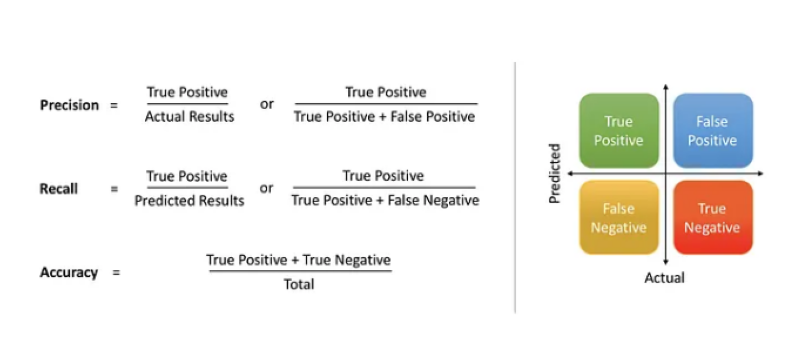

In [54]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("precision_recall.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

In [59]:
from sklearn.metrics import classification_report

In [58]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   --------------- ------------------------ 3.4/8.9 MB 16.7 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.9 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 16.2 MB/s  0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   --- ------------------------------------ 3.4/41.3 MB 16.8 MB/s eta 0:00:03
   ------ --------------------------------- 6.8/41.3 MB 16.8 MB/s eta 0:00:03
   ---------- ----------------------------- 11.0/41.3 MB 18.1 MB/s eta 0:00:02
   -------------- ------------------------- 15.2/41.3 MB 18.0 MB/s eta 0:00:02
   ------------------- -------------------- 19.7/41.3 MB 18.8 MB/s eta 0:00:02
   ---------------------- ----------------- 23.6/41.3 MB 18.9 MB/s eta 0:00:01
   --------------------------- ------------ 28.0/41.3 MB 19.1 MB/s eta 0:00:01
   ------------------------------- -------- 32.5/41.3 MB 19.3 MB/s eta 0:00:01
   

In [60]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

        ants       0.91      0.97      0.94        76
        bees       0.88      0.95      0.91        75
      beetle       0.73      0.68      0.70        63
catterpillar       0.82      0.61      0.70        66
  earthworms       0.84      0.84      0.84        49
      earwig       0.68      0.69      0.69        71
 grasshopper       0.83      0.84      0.83        74
        moth       0.97      0.96      0.97        76
        slug       0.80      0.88      0.84        60
       snail       0.96      0.99      0.97        75
        wasp       0.95      0.92      0.93        76
      weevil       0.90      0.93      0.91        74

    accuracy                           0.86       835
   macro avg       0.85      0.85      0.85       835
weighted avg       0.86      0.86      0.86       835



(np.float64(-0.5), np.float64(712.5), np.float64(275.5), np.float64(-0.5))

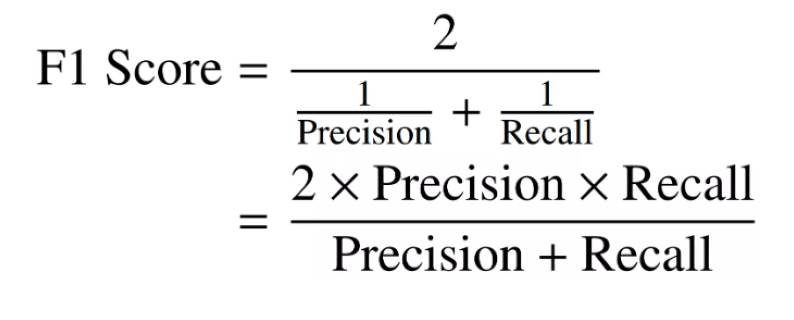

In [61]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("f1-score.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
cm= confusion_matrix(y_true,predicted_categories)

In [64]:
cm

array([[74,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0, 71,  0,  0,  0,  2,  0,  0,  0,  0,  2,  0],
       [ 2,  0, 43,  1,  0,  5,  3,  0,  1,  0,  1,  7],
       [ 1,  3,  4, 40,  4,  5,  4,  1,  4,  0,  0,  0],
       [ 0,  0,  0,  1, 41,  2,  0,  0,  3,  2,  0,  0],
       [ 3,  4,  5,  1,  1, 49,  4,  1,  2,  0,  1,  0],
       [ 0,  1,  0,  5,  1,  5, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 73,  1,  0,  0,  0],
       [ 0,  0,  2,  0,  1,  2,  1,  0, 53,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 74,  0,  0],
       [ 1,  2,  1,  0,  0,  1,  1,  0,  0,  0, 70,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  1,  0,  0, 69]])

In [65]:
cm.shape

(12, 12)

## Confusion matrix visualisation

Text(0.5, 1.0, 'Agricultural Pest Detection Confusion Matrix')

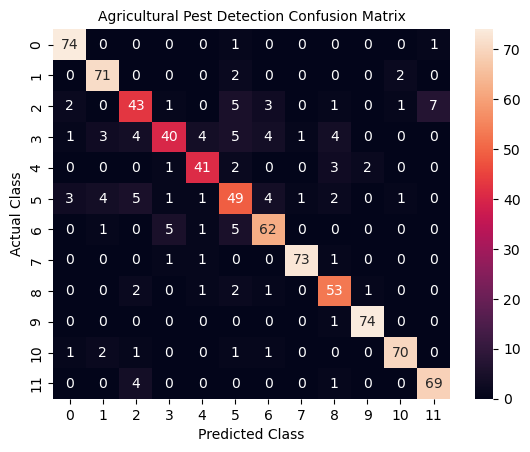

In [71]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Agricultural Pest Detection Confusion Matrix",fontsize=10)

In [ ]:
Testing on a random image

In [ ]:
image_path = "weevil.jpg"
img= cv2.imread(image_path)
#Displaying image
plt.imshow(img)
plt.title("Test_